**Вардумян А.Т. ИУ5-61Б**

<a id='0'></a>
# Оглавление

2. [Задание](#1)<br>
3. [Описание датасета](#2)<br>
4. [Импорт библиотек](#3)<br>
5. [Загрузка и первичный анализ данных](#4)<br>
6. [Построение модели](#5)<br>
7. [Сравнение моделей](#6)<br>

<a id="1"></a>
# Задание ([к оглавлению](#0))

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
    * одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
    * SVM;
    * дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

<a id="2"></a>
# Описание датасета ([к оглавлению](#0))

Digital payments are evolving, but so are cyber criminals.

According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.


This Dataset sourced by some unnamed institute.

---

**Feature Explanation:**

`distancefromhome` - the distance from home where the transaction happened.

`distancefromlast_transaction` - the distance from last transaction happened.

`ratiotomedianpurchaseprice` - Ratio of purchased price transaction to median purchase price.

`repeat_retailer` - Is the transaction happened from same retailer.

`used_chip` - Is the transaction through chip (credit card).

`usedpinnumber` - Is the transaction happened by using PIN number.

`online_order` - Is the transaction an online order.

`fraud` - Is the transaction fraudulent.

<a id="3"></a>
# Импорт библиотек ([к оглавлению](#0))

In [1]:
import numpy as np
import pandas as pd

from io import StringIO 
import graphviz
import pydotplus
from IPython.core.display import HTML, Image
from operator import itemgetter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

<a id="4"></a>
# Загрузка и первичный анализ данных ([к оглавлению](#0))

## Подготовка данных

In [2]:
df = pd.read_csv("card_transdata.csv")
df = df.head(100000)
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              100000 non-null  float64
 1   distance_from_last_transaction  100000 non-null  float64
 2   ratio_to_median_purchase_price  100000 non-null  float64
 3   repeat_retailer                 100000 non-null  float64
 4   used_chip                       100000 non-null  float64
 5   used_pin_number                 100000 non-null  float64
 6   online_order                    100000 non-null  float64
 7   fraud                           100000 non-null  float64
dtypes: float64(8)
memory usage: 6.1 MB


In [4]:
df = df.rename(columns={
    "distance_from_home": "dist_home",
    "distance_from_last_transaction": "dist_last",
    "ratio_to_median_purchase_price": "ratio",
    "repeat_retailer": "repeat",
    "used_chip": "chip",
    "used_pin_number": "pin",
    "online_order": "online"
})
df.head()

,dist_home,dist_last,ratio,repeat,chip,pin,online,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.describe()

,dist_home,dist_last,ratio,repeat,chip,pin,online,fraud
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,26.688487,5.023716,1.819374,0.882090,0.351060,0.103250,0.650660,0.087100
std,65.132078,24.439420,2.912849,0.322503,0.477304,0.304287,0.476764,0.281983
min,0.021322,0.000488,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.864892,0.295815,0.476392,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.965281,0.996695,0.996081,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.726777,3.333064,2.089016,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
discrete_features = [
    "repeat",
    "chip",
    "pin",
    "online",
    "fraud"
]

discrete_features = [
    "repeat",
    "chip",
    "pin",
    "online",
    "fraud"
]

for feat in discrete_features:
    df[feat] = df[feat].astype(int)
    print(f'Колонка {feat}: {df[feat].unique()}')

Колонка repeat: [1 0]
Колонка chip: [1 0]
Колонка pin: [0 1]
Колонка online: [0 1]
Колонка fraud: [0 1]


## Корреляционный анализ

In [7]:
df.corr()

,dist_home,dist_last,ratio,repeat,chip,pin,online,fraud
dist_home,1.000000,-0.002562,-0.000656,0.143589,-0.002928,0.002518,-0.000250,0.187143
dist_last,-0.002562,1.000000,0.000531,-0.006873,0.000284,0.001851,-0.001003,0.097031
ratio,-0.000656,0.000531,1.000000,-0.001365,-0.000684,0.001522,0.002817,0.441085
repeat,0.143589,-0.006873,-0.001365,1.000000,-0.002641,-0.002301,0.003508,-0.002200
chip,-0.002928,0.000284,-0.000684,-0.002641,1.000000,-0.000048,-0.001629,-0.062392
pin,0.002518,0.001851,0.001522,-0.002301,-0.000048,1.000000,0.000616,-0.101431
online,-0.000250,-0.001003,0.002817,0.003508,-0.001629,0.000616,1.000000,0.192710
fraud,0.187143,0.097031,0.441085,-0.002200,-0.062392,-0.101431,0.192710,1.000000


In [8]:
df.corr()['fraud']

dist_home    0.187143
dist_last    0.097031
ratio        0.441085
repeat      -0.002200
chip        -0.062392
pin         -0.101431
online       0.192710
fraud        1.000000
Name: fraud, dtype: float64

<AxesSubplot:>

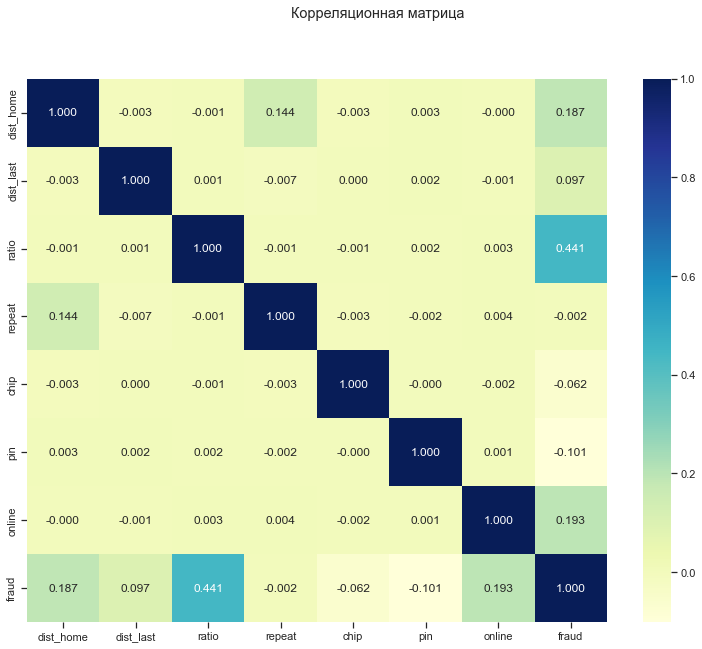

In [9]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(13,10))
fig.suptitle('Корреляционная матрица')
sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.3f', cmap='YlGnBu')

<a id="5"></a>
# Построение модели ([к оглавлению](#0))

## Разделение выборки

In [10]:
X = df.loc[:, df.columns != 'fraud']
y = df["fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## Линейная модель

In [12]:
%%time
pipe = Pipeline([('scaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

lnr = pipe.fit(X_train, y_train)

CPU times: user 194 ms, sys: 5.95 ms, total: 200 ms
Wall time: 114 ms


In [13]:
lnr_predict = lnr.predict(X_test)
lnr.score(X_test, y_test)

0.96055

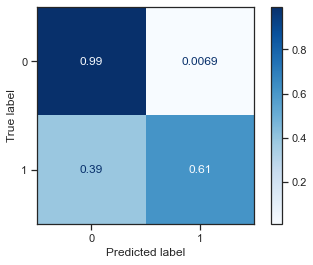

In [14]:
plot_confusion_matrix(lnr, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

In [15]:
print(classification_report(y_test, lnr_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18294
           1       0.89      0.61      0.73      1706

    accuracy                           0.96     20000
   macro avg       0.93      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [16]:
recall_score(y_test, lnr_predict)

0.611957796014068

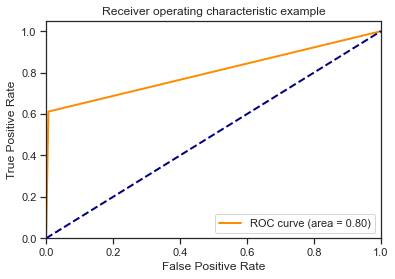

In [17]:
draw_roc_curve(y_test, lnr_predict, pos_label=1, average='micro')

## Машина опорных векторов

In [18]:
%%time
pipe = Pipeline([('scaler', StandardScaler()),
                ('svc', SVC(kernel='rbf', C=1E6))])

svc = pipe.fit(X_train, y_train)

CPU times: user 4.45 s, sys: 76.6 ms, total: 4.53 s
Wall time: 4.55 s


In [19]:
svc_predict = svc.predict(X_test)
svc.score(X_test, y_test)

0.99815

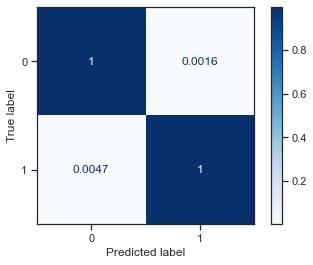

In [20]:
plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

In [21]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18294
           1       0.98      1.00      0.99      1706

    accuracy                           1.00     20000
   macro avg       0.99      1.00      0.99     20000
weighted avg       1.00      1.00      1.00     20000



In [22]:
recall_score(y_test, svc_predict)

0.9953106682297772

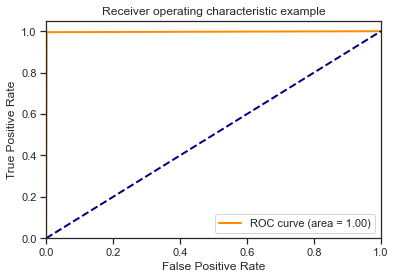

In [23]:
draw_roc_curve(y_test, svc_predict, pos_label=1, average='micro')

## Дерево решений

In [24]:
%%time
tree = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

CPU times: user 107 ms, sys: 4.91 ms, total: 112 ms
Wall time: 117 ms


In [25]:
tree_predict = tree.predict(X_test)
tree.score(X_test, y_test)

1.0

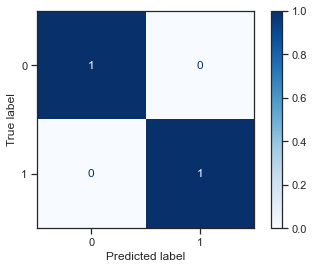

In [26]:
plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

In [27]:
print(classification_report(y_test, tree_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18294
           1       1.00      1.00      1.00      1706

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [28]:
recall_score(y_test, tree_predict)

1.0

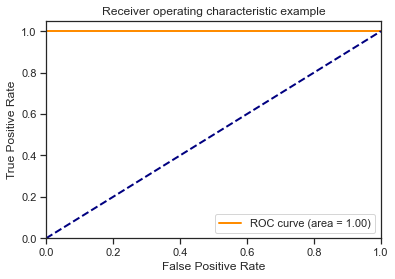

In [29]:
draw_roc_curve(y_test, tree_predict, pos_label=1, average='micro')

In [30]:
feature_colums = list(df.columns[df.columns != 'fraud'])
feature_colums

['dist_home', 'dist_last', 'ratio', 'repeat', 'chip', 'pin', 'online']

In [31]:
tree_rules = export_text(tree, feature_colums)
HTML('<pre>' + tree_rules + '</pre>')

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass feature_names=['dist_home', 'dist_last', 'ratio', 'repeat', 'chip', 'pin', 'online'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [32]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

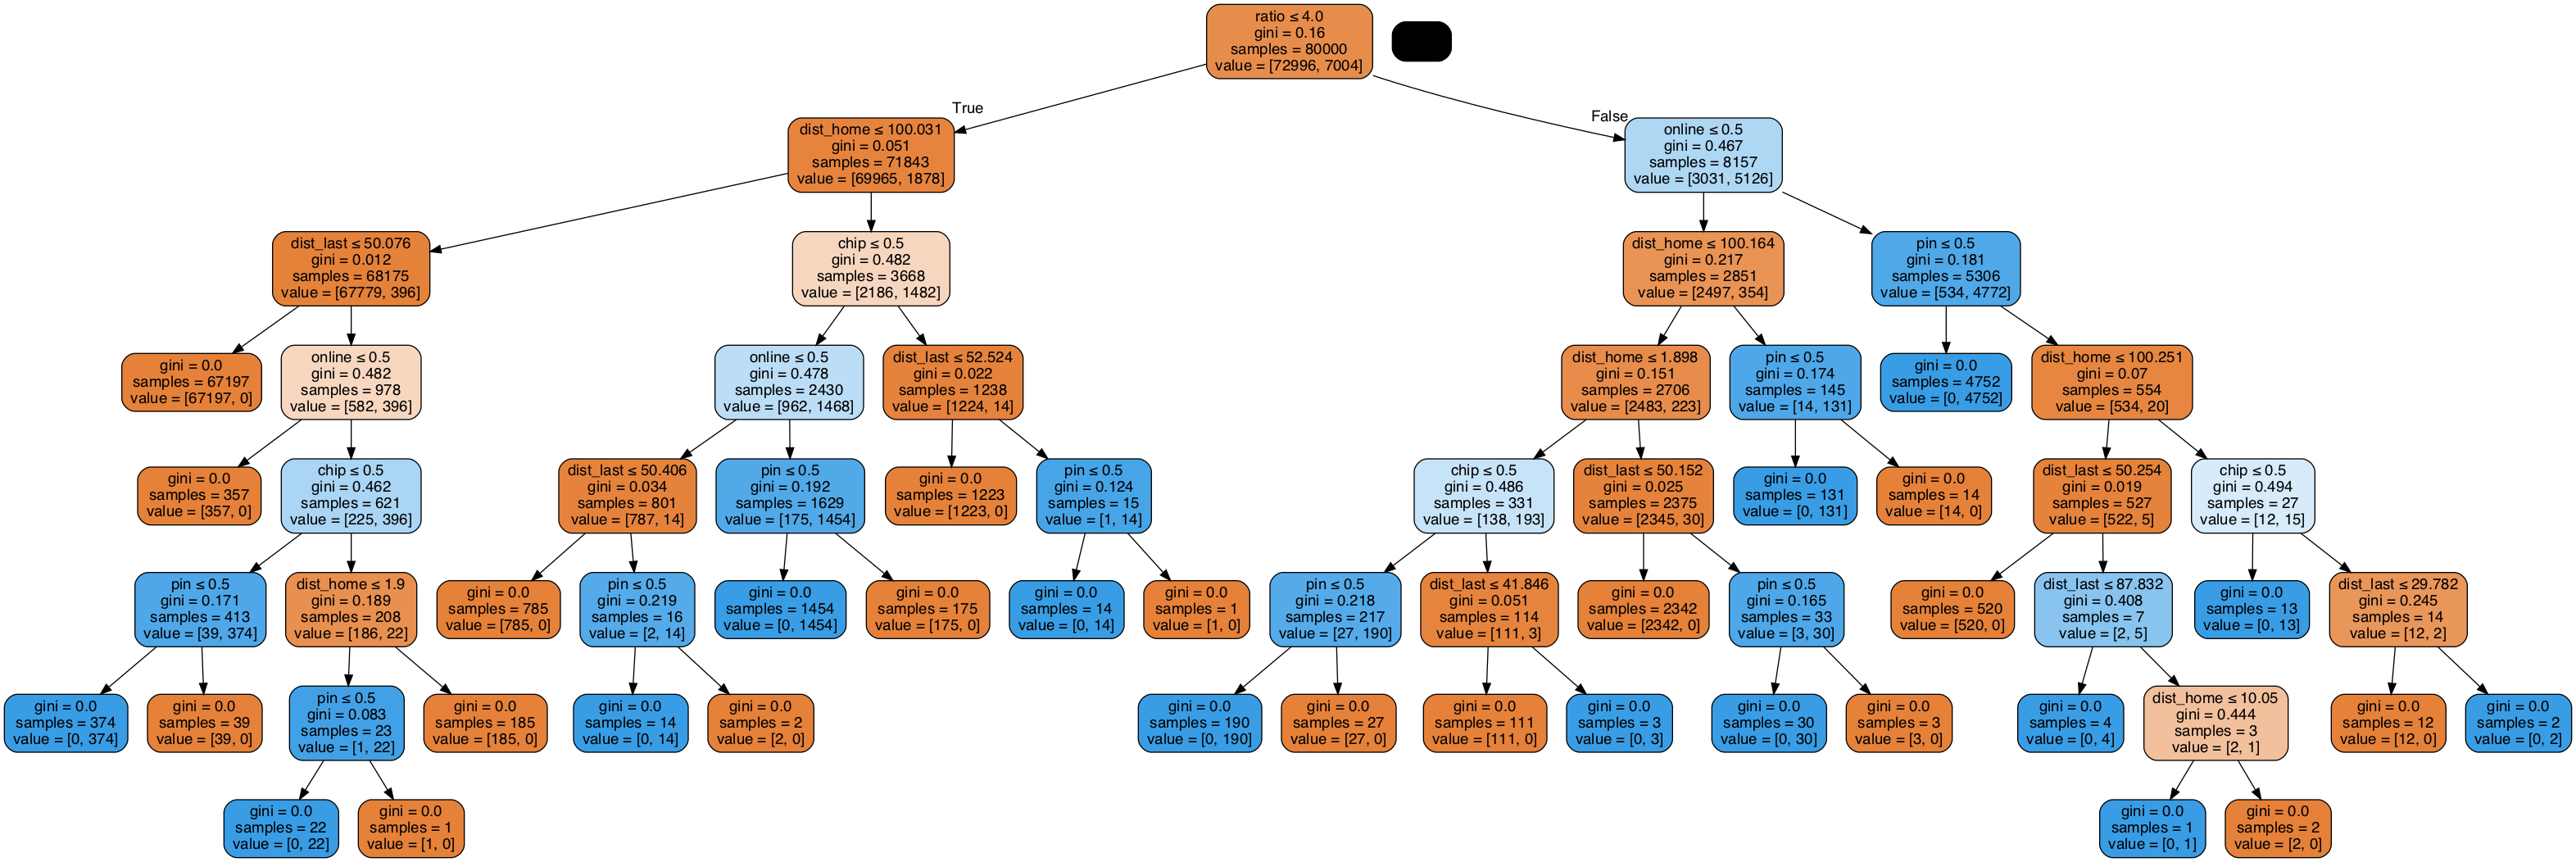

In [33]:
Image(get_png_tree(tree, feature_colums), width='100%')

In [34]:
def draw_feature_importances(tree_model, X_dataset, figsize=(18,10)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

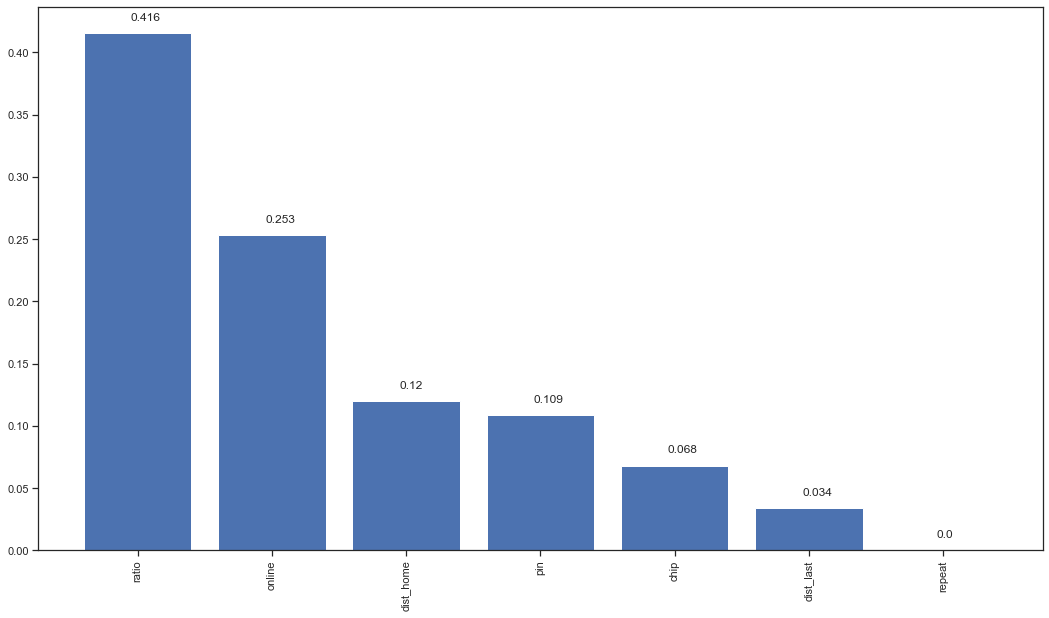

(['ratio', 'online', 'dist_home', 'pin', 'chip', 'dist_last', 'repeat'],
 [0.41577870728627975,
  0.2531469925808649,
  0.11991310551319533,
  0.10877404009904783,
  0.06815481537280876,
  0.0342323391478034,
  0.0])

In [35]:
draw_feature_importances(tree, X)

<a id="6"></a>
# Сравнение моделей ([к оглавлению](#0))

|Метрика|LogisticRegression|SVC|DesicionTree|
| :- | :-: | :-: | :-: |
|Recall|0.612|0.995|1.00|
|AUC|0.80|1.00|1.00|